# Classification: Wisconsin Breast Cancer
- Dataset from UCI repository
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

### Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [1]:
import numpy as np
import pandas as pd

## 1. Load the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = [
    'Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 
    'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.sample(5)

,Code,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
483,474162,8,7,8,5,5,10,9,10,1,4
561,1321942,5,1,1,1,2,1,3,1,1,2
589,1272166,5,1,1,1,2,1,1,1,1,2
443,734111,1,1,1,1,2,2,1,1,1,2
228,1228311,1,1,1,1,1,1,3,1,1,2


### 2. Data preprocessing

In [4]:
dataset = dataset.set_index('Code')
# binary class label
dataset['Class'] = dataset.Class.map({2: 0, 4: 1})

In [5]:
dataset.dtypes

Clump-Thickness      int64
Cell-Size            int64
Cell-Shape           int64
Adhesion             int64
Single-Cell-Size     int64
Bare-Nuclei         object
Chromatin            int64
Nucleoli             int64
Mitoses              int64
Class                int64
dtype: object

In [6]:
for col in dataset.columns:
    unique_values = np.sort(dataset[col].unique())
    print('{:20}: {}'.format(col, unique_values))

Clump-Thickness     : [ 1  2  3  4  5  6  7  8  9 10]
Cell-Size           : [ 1  2  3  4  5  6  7  8  9 10]
Cell-Shape          : [ 1  2  3  4  5  6  7  8  9 10]
Adhesion            : [ 1  2  3  4  5  6  7  8  9 10]
Single-Cell-Size    : [ 1  2  3  4  5  6  7  8  9 10]
Bare-Nuclei         : ['1' '10' '2' '3' '4' '5' '6' '7' '8' '9' '?']
Chromatin           : [ 1  2  3  4  5  6  7  8  9 10]
Nucleoli            : [ 1  2  3  4  5  6  7  8  9 10]
Mitoses             : [ 1  2  3  4  5  6  7  8 10]
Class               : [0 1]


#### Bare-Nuclei 전처리 필요

In [7]:
dataset['Bare-Nuclei'].value_counts()
# print(dataset.groupby('Bare-Nuclei').size()) # the same

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare-Nuclei, dtype: int64

In [8]:
# mark ? as NaN
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].replace('?', np.NaN)
# Convert the type of 'Bare-Nuclei' column as float
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].astype(float)
# Drop NaN
# dataset.dropna(axis=0, how='any', inplace=True)
# Fill NaN
dataset.fillna(dataset['Bare-Nuclei'].mean(), inplace=True)

In [9]:
dataset.sample(5)

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
Code,,,,,,,,,,
1174428,5,3,5,1,8,10.0,5,3,1,1
13454352,1,1,3,1,2,1.0,2,1,1,0
353098,4,1,1,2,2,1.0,1,1,1,0
1211594,3,1,1,1,1,1.0,2,1,1,0
1368267,5,1,1,1,2,1.0,1,1,1,0


In [10]:
dataset.dtypes

Clump-Thickness       int64
Cell-Size             int64
Cell-Shape            int64
Adhesion              int64
Single-Cell-Size      int64
Bare-Nuclei         float64
Chromatin             int64
Nucleoli              int64
Mitoses               int64
Class                 int64
dtype: object

### 3. Data summarization

In [11]:
# shape
print(dataset.shape)

(699, 10)


In [12]:
# class distribution
print(dataset.groupby('Class').size())
# print(dataset['Class'].value_counts()) # the same

Class
0    458
1    241
dtype: int64


In [13]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)
pd.set_option('display.width', 200)
print(dataset.describe())

       Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses    Class
count          699.000    699.000     699.000   699.000           699.000      699.000    699.000   699.000  699.000  699.000
mean             4.418      3.134       3.207     2.807             3.216        3.545      3.438     2.867    1.589    0.345
std              2.816      3.051       2.972     2.855             2.214        3.602      2.438     3.054    1.715    0.476
min              1.000      1.000       1.000     1.000             1.000        1.000      1.000     1.000    1.000    0.000
25%              2.000      1.000       1.000     1.000             2.000        1.000      2.000     1.000    1.000    0.000
50%              4.000      1.000       1.000     1.000             2.000        1.000      3.000     1.000    1.000    0.000
75%              6.000      5.000       5.000     4.000             4.000        5.000      5.000     4.000    1.000  

In [14]:
# correlation
print(dataset.corr(method='pearson'))

                  Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses  Class
Clump-Thickness             1.000      0.645       0.655     0.486             0.522        0.587      0.558     0.536    0.350  0.716
Cell-Size                   0.645      1.000       0.907     0.706             0.752        0.687      0.756     0.723    0.459  0.818
Cell-Shape                  0.655      0.907       1.000     0.683             0.720        0.710      0.736     0.719    0.439  0.819
Adhesion                    0.486      0.706       0.683     1.000             0.600        0.665      0.667     0.603    0.418  0.697
Single-Cell-Size            0.522      0.752       0.720     0.600             1.000        0.581      0.616     0.629    0.479  0.683
Bare-Nuclei                 0.587      0.687       0.710     0.665             0.581        1.000      0.676     0.577    0.339  0.816
Chromatin                   0.558      0.756       0.73

### 4. Data visualization

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (15,15)

In [17]:
features = [
    'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 
    'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 
    'Chromatin', 'Nucleoli', 'Mitoses']

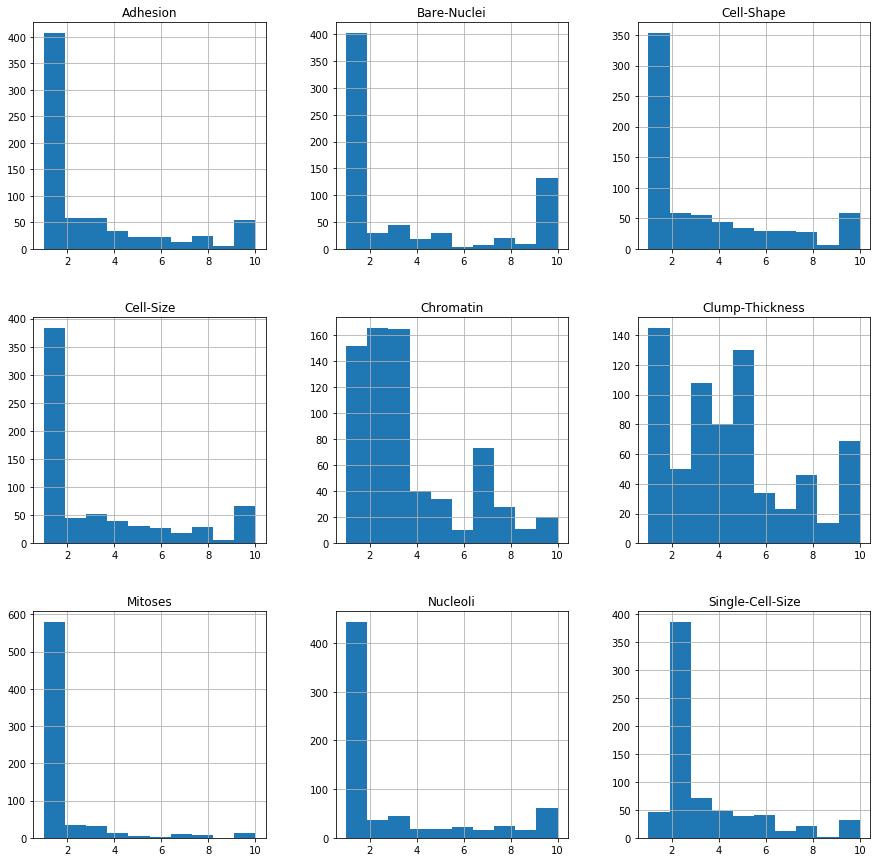

In [18]:
# histograms
dataset[features].hist()
plt.show()

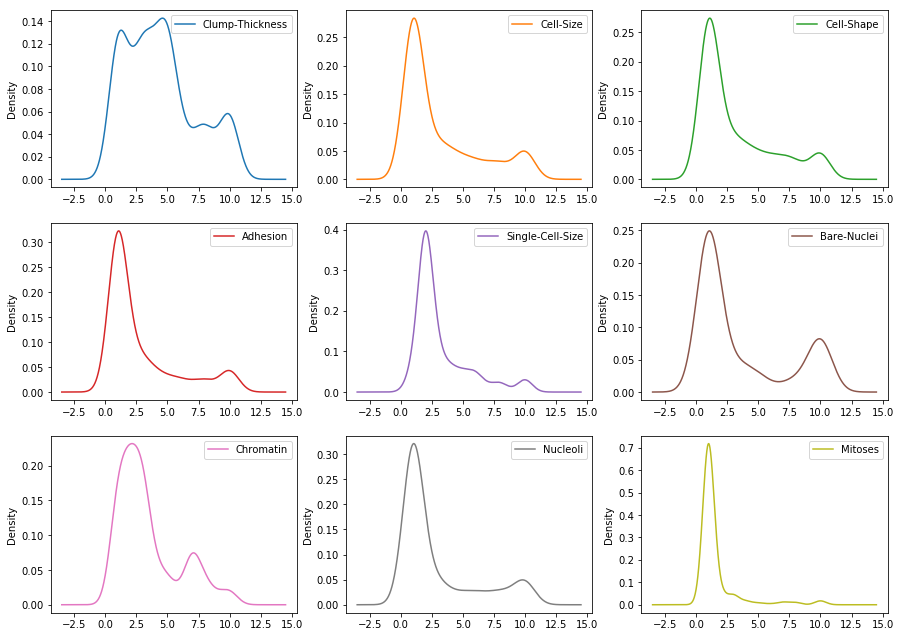

In [19]:
# density
dataset[features].plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

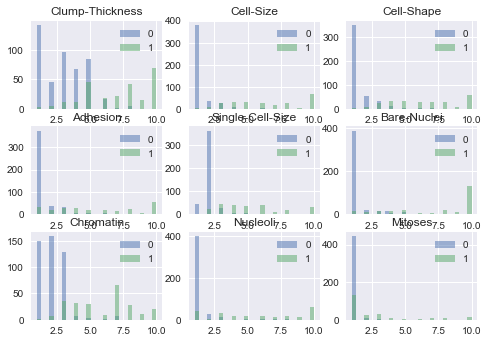

In [40]:
for i, col in enumerate(features):
    c = dataset[col]
    c0 = c[dataset.Class == 0]
    c1 = c[dataset.Class == 1]
    bins = np.linspace(c.min(), c.max(), 30)

    m = i // 3 + 1
    n = i % 3 + 1

    plt.subplot(3, 3, (i+1))
    plt.hist(c0, bins, alpha=0.5, label='0')
    plt.hist(c1, bins, alpha=0.5, label='1')
    plt.title(col)
    plt.legend()

plt.show()

/Users/ijaehyeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


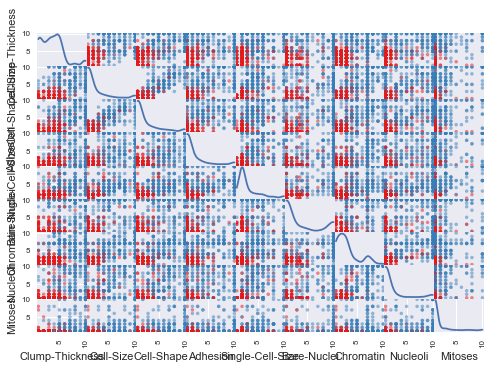

In [41]:
# scatter matrix
color_map = {0: '#e41a1c', 1:'#377eb8'}
colors = dataset['Class'].apply(lambda group: color_map[group])
pd.tools.plotting.scatter_matrix(dataset[features], diagonal='kde', c=colors)
plt.show()

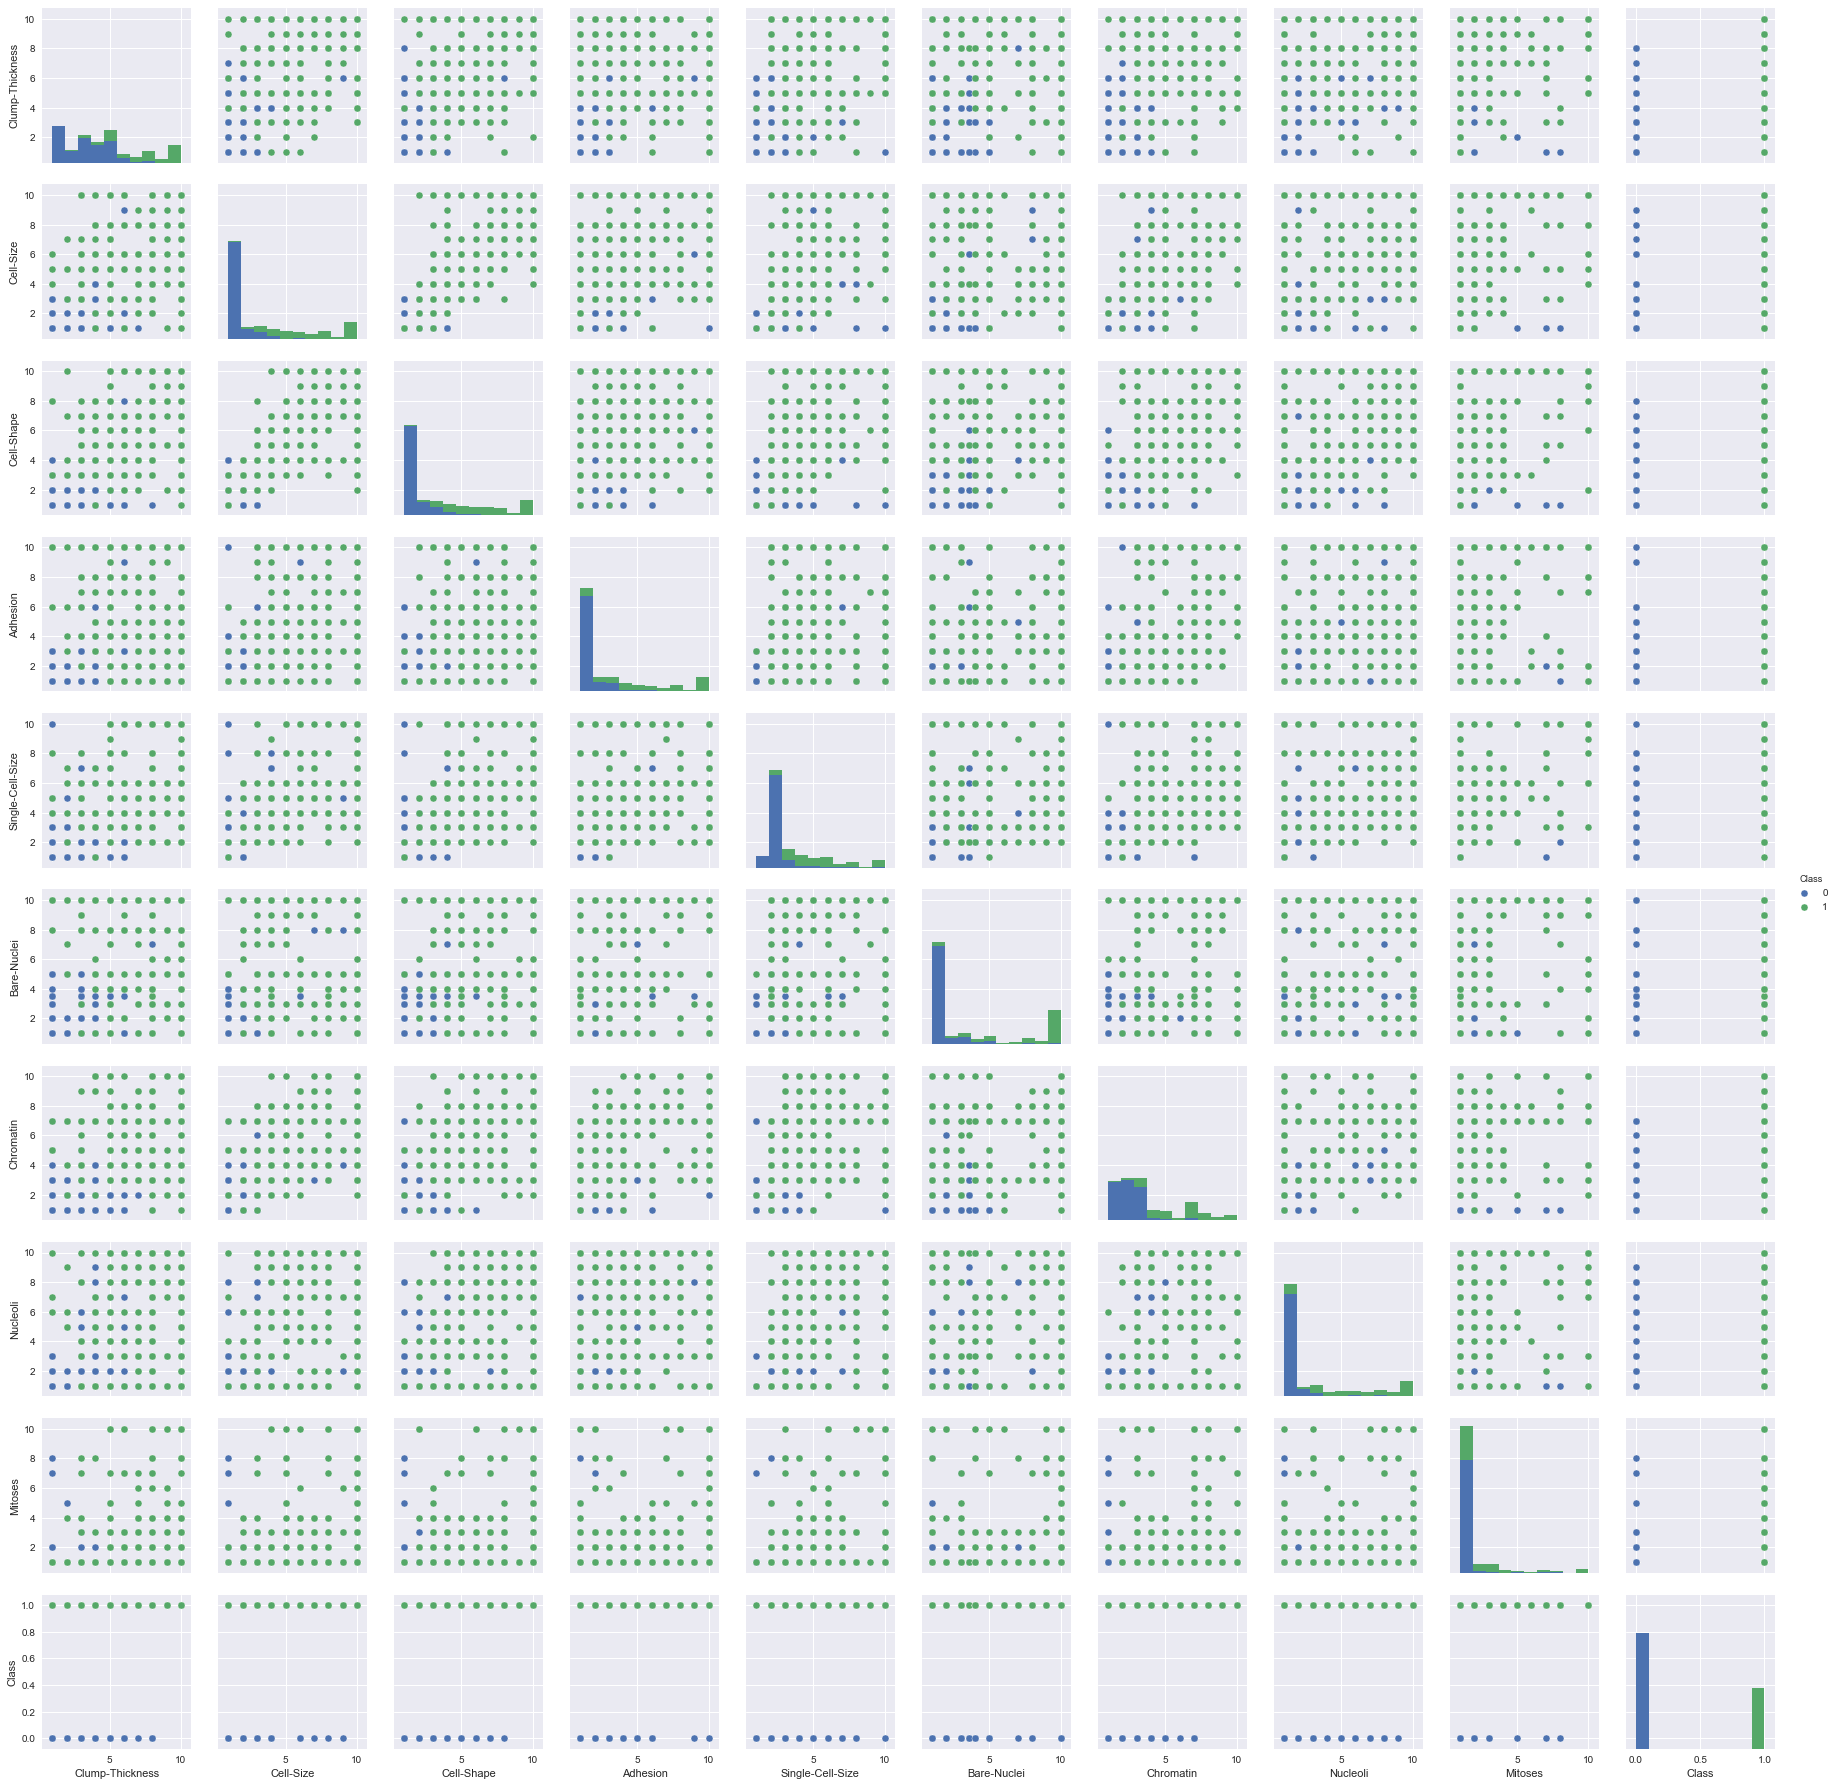

In [42]:
import seaborn as sns
sns.pairplot(dataset, hue='Class')

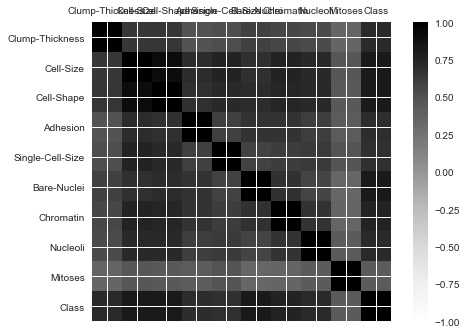

In [43]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[1:11])
ax.set_yticklabels(names[1:11])
plt.show()

### 5. Preparation

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Split-out validation dataset
array = dataset.values
X = array[:, :-1]
Y = array[:, -1]
validation_size = 0.20
seed = 123
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed, stratify=Y)

In [46]:
# Evaluate Algorithms
# Test options and evaluation metric
num_split = 10
# http://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'f1_micro'
# scoring = 'accuracy'

### 6. Learn models

In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [49]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))

In [50]:
names = []
results = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_split, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.967564 (0.027874)
KNN: 0.969445 (0.028139)
NB: 0.962173 (0.022198)
CART: 0.939018 (0.021942)


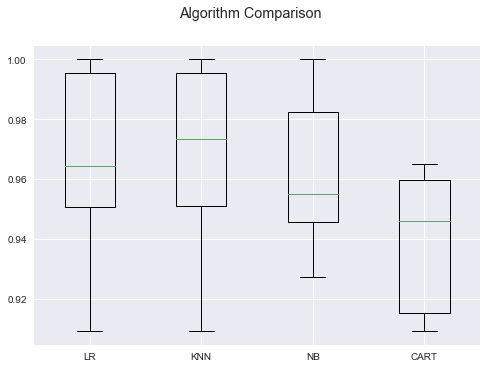

In [51]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))

In [55]:
results = []
names = []
for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=num_split, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.969350 (0.028177)
ScaledKNN: 0.969445 (0.021583)
ScaledNB: 0.962173 (0.022198)
ScaledCART: 0.939176 (0.021641)


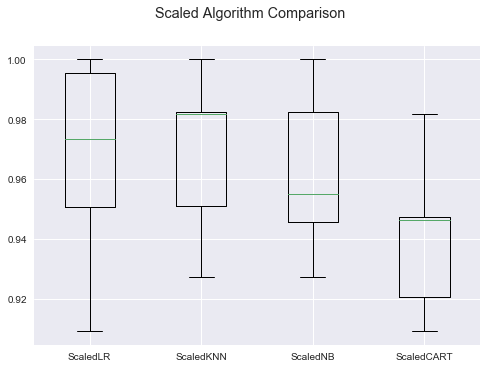

In [56]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 7. Cross Validation

![](https://i.stack.imgur.com/YWgro.gif)

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
#################### TRY LOGISTIC REGRESSION #########################

print('--------- Now Trying Logistic Regression Classifier ---------')

#Make Logistic Regression Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', tol=0.0001, C=1.0, random_state=1, max_iter=1000, n_jobs=-1))])
print('--> Made Logistic Regression Pipeline')

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_range_small = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
param_grid_lr = [{
    'clf__penalty': ['l1'],
    'clf__C': param_range,
    'clf__tol': param_range_small
}, {
    'clf__penalty': ['l2'],
    'clf__C': param_range,
    'clf__tol': param_range_small
}]
gs_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
gs_lr = gs_lr.fit(X_train, Y_train)
print('--> Tuned Parameters Best Score: ',gs_lr.best_score_)
print('--> Best Parameters: \n',gs_lr.best_params_)

#Use best parameters
clf_lr = gs_lr.best_estimator_
#Get Final Scores
clf_lr.fit(X_train, Y_train)
scores_lr = cross_val_score(
    estimator=clf_lr,
    X=X_train,
    y=Y_train,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
print('--> Final Model Training {} score: {:.3f} +/- {:.3f}'.format(scoring, np.mean(scores_lr), np.std(scores_lr)))

print('--> Final {} score on Test set: {:.5f}'.format(scoring, clf_lr.score(X_test, Y_test)))

--------- Now Trying Logistic Regression Classifier ---------
--> Made Logistic Regression Pipeline
--> Tuned Parameters Best Score:  0.973166368515
--> Best Parameters: 
 {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__tol': 1e-06}
--> Final Model Training f1_micro score: 0.973 +/- 0.022
--> Final f1_micro score on Test set: 0.95714


In [59]:
#################### TRY K-NEAREST NEIGHBORS #########################

print('--------- Now Trying k-NN Classifier ---------')

#Make Logistic Regression Pipeline
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2, n_jobs=-1))])
print('--> Made k-NN Pipeline')

#Tune Hyperparameters
param_n_neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid_knn = [{
    'clf__p': [1, 2],
    'clf__n_neighbors': param_n_neighbors,
    'clf__weights': ['uniform', 'distance']
}]
gs_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid_knn,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
gs_knn = gs_knn.fit(X_train, Y_train)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

#Use best parameters
clf_knn = gs_knn.best_estimator_
#Get Final Scores
clf_knn.fit(X_train, Y_train)
scores_knn = cross_val_score(
    estimator=clf_knn,
    X=X_train,
    y=Y_train,
    cv=num_split,
    scoring=scoring,
    n_jobs=-1)
print('--> Final Model Training {} score: {:.3f} +/- {:.3f}'.format(scoring, np.mean(scores_knn), np.std(scores_knn)))

print('--> Final {} score on Test set: {:.5f}'.format(scoring, clf_knn.score(X_test, Y_test)))

--------- Now Trying k-NN Classifier ---------
--> Made k-NN Pipeline
--> Tuned Parameters Best Score:  0.974955277281
--> Best Parameters: 
 {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'uniform'}
--> Final Model Training f1_micro score: 0.975 +/- 0.027
--> Final f1_micro score on Test set: 0.94286


In [60]:
#################### TRY NAIVE BAYES #########################

print('--------- Now Trying Naive Bayes Classifier ---------')

#Make Logistic Regression Pipeline
pipe_nb = Pipeline([('scl', StandardScaler()),
                    ('clf', GaussianNB())])
print('--> Made Naive Bayes Pipeline')

#Use best parameters
clf_nb = pipe_nb
#Get Final Scores
clf_nb.fit(X_train, Y_train)
scores_nb = cross_val_score(
    estimator=clf_nb,
    X=X_train,
    y=Y_train,
    cv=num_split,
    scoring=scoring,
    n_jobs=-1)
print('--> Final Model Training {} score: {:.3f} +/- {:.3f}'.format(scoring, np.mean(scores_nb), np.std(scores_nb)))

print('--> Final {} score on Test set: {:.5f}'.format(scoring, clf_nb.score(X_test, Y_test)))

--------- Now Trying Naive Bayes Classifier ---------
--> Made Naive Bayes Pipeline
--> Final Model Training f1_micro score: 0.962 +/- 0.022
--> Final f1_micro score on Test set: 0.94286


In [61]:
#################### TRY DECISION TREE #########################

print('--------- Now Trying Decision Tree Classifier ---------')

#Make Logistic Regression Pipeline
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(criterion='gini', max_depth=None, class_weight=None))])
print('--> Made Decision Tree Pipeline')

#Tune Hyperparameters
param_grid_dt = [{
    'clf__criterion': ['gini', 'entropy'],
    'clf__class_weight': ['balanced', None]
}]
gs_dt = GridSearchCV(
    estimator=pipe_dt,
    param_grid=param_grid_dt,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
gs_dt = gs_dt.fit(X_train, Y_train)
print('--> Tuned Parameters Best Score: ',gs_dt.best_score_)
print('--> Best Parameters: \n',gs_dt.best_params_)

#Use best parameters
clf_dt = gs_dt.best_estimator_
#Get Final Scores
clf_dt.fit(X_train, Y_train)
scores_dt = cross_val_score(
    estimator=clf_dt,
    X=X_train,
    y=Y_train,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
print('--> Final Model Training {} score: {:.3f} +/- {:.3f}'.format(scoring, np.mean(scores_dt), np.std(scores_dt)))

print('--> Final {} score on Test set: {:.5f}'.format(scoring, clf_dt.score(X_test, Y_test)))

--------- Now Trying Decision Tree Classifier ---------
--> Made Decision Tree Pipeline
--> Tuned Parameters Best Score:  0.940966010733
--> Best Parameters: 
 {'clf__class_weight': None, 'clf__criterion': 'entropy'}
--> Final Model Training f1_micro score: 0.937 +/- 0.037
--> Final f1_micro score on Test set: 0.92143


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
#################### TRY RANDOM FOREST #########################

print('--------- Now Trying Random Forest Classifier ---------')

#Make Logistic Regression Pipeline
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(max_features='sqrt', n_estimators=20))])
print('--> Made Random Forest Pipeline')

#Tune Hyperparameters
param_grid_rf = [{
    'clf__max_features': [1, 3, 5, 7, 9, 'auto', 'sqrt', 'log2', None],
    'clf__n_estimators': [1, 10, 50, 100]
}]
gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
gs_rf = gs_rf.fit(X_train, Y_train)
print('--> Tuned Parameters Best Score: ',gs_rf.best_score_)
print('--> Best Parameters: \n',gs_rf.best_params_)

#Use best parameters
clf_rf = gs_rf.best_estimator_
#Get Final Scores
clf_rf.fit(X_train, Y_train)
scores_rf = cross_val_score(
    estimator=clf_rf,
    X=X_train,
    y=Y_train,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
print('--> Final Model Training {} score: {:.3f} +/- {:.3f}'.format(scoring, np.mean(scores_rf), np.std(scores_rf)))

print('--> Final {} score on Test set: {:.5f}'.format(scoring, clf_rf.score(X_test, Y_test)))

--------- Now Trying Random Forest Classifier ---------
--> Made Random Forest Pipeline
--> Tuned Parameters Best Score:  0.976744186047
--> Best Parameters: 
 {'clf__max_features': 1, 'clf__n_estimators': 50}
--> Final Model Training f1_micro score: 0.971 +/- 0.027
--> Final f1_micro score on Test set: 0.95714


In [ ]:
########### FEATURE IMPORTANCE ##########################

from sklearn.ensemble import RandomForestClassifier

# sns.set(style='whitegrid')

feat_labels = dataset.columns
forest = RandomForestClassifier(n_estimators = 10000, random_state=0, n_jobs=-1)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_
indicies = np.argsort(importances)[::-1]
plt.title('Feature Importancces')
plt.bar(range(X_train.shape[1]),
        importances[indicies],
        color='blue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indicies], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
#################### TRY BAGGING #########################

print('--------- Now Trying Bagging Classifier ---------')

#Make Bagging Pipeline
pipe_bg = Pipeline([('scl', StandardScaler()),
                    ('clf', BaggingClassifier(n_estimators=20, n_jobs=-1))])
print('--> Made Bagging Pipeline')

#Tune Hyperparameters
param_grid_bg = [{
    'clf__n_estimators': [1, 10, 50, 100, 200, 300]
}]
gs_bg = GridSearchCV(
    estimator=pipe_bg,
    param_grid=param_grid_bg,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
gs_bg = gs_bg.fit(X_train, Y_train)
print('--> Tuned Parameters Best Score: ',gs_bg.best_score_)
print('--> Best Parameters: \n',gs_bg.best_params_)

#Use best parameters
clf_bg = gs_bg.best_estimator_
#Get Final Scores
clf_bg.fit(X_train, Y_train)
scores_bg = cross_val_score(
    estimator=clf_bg,
    X=X_train,
    y=Y_train,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
print('--> Final Model Training {} score: {:.3f} +/- {:.3f}'.format(scoring, np.mean(scores_bg), np.std(scores_bg)))

print('--> Final {} score on Test set: {:.5f}'.format(scoring, clf_bg.score(X_test, Y_test)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#################### TRY GradientBoostingClassifier #########################

print('--------- Now Trying GradientBoostingClassifier ---------')

#Make GB Pipeline
pipe_gb = Pipeline([('scl', StandardScaler()),
                    ('clf', GradientBoostingClassifier())])
print('--> Made GradientBoostingClassifier Pipeline')

#Tune Hyperparameters
param_grid_gb = [{
    'clf__loss': ['deviance', 'exponential'],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__n_estimators': [1, 10, 50, 100],
    'clf__max_depth': [1, 3, 5, 7, 9],
    'clf__criterion': ['friedman_mse', 'mse', 'mae'],
    'clf__max_features': [1, 3, 5, 7, 9, 'auto', 'sqrt', 'log2', None],
}]
gs_gb = GridSearchCV(
    estimator=pipe_gb,
    param_grid=param_grid_gb,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
gs_gb = gs_gb.fit(X_train, Y_train)
print('--> Tuned Parameters Best Score: ',gs_gb.best_score_)
print('--> Best Parameters: \n',gs_gb.best_params_)

#Use best parameters
clf_gb = gs_gb.best_estimator_
#Get Final Scores
clf_gb.fit(X_train, Y_train)
scores_gb = cross_val_score(
    estimator=clf_gb,
    X=X_train,
    y=Y_train,
    scoring=scoring,
    cv=num_split,
    n_jobs=-1)
print('--> Final Model Training {} score: {:.3f} +/- {:.3f}'.format(scoring, np.mean(scores_gb), np.std(scores_gb)))

print('--> Final {} score on Test set: {:.5f}'.format(scoring, clf_gb.score(X_test, Y_test)))